# Clusterizacion K means

## DESAFÍO OPCIONAL

Aplicar una técnica de Clustering sobre el dataset. ¿Qué clusters encuentras? ¿A qué pueden corresponder? 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [2]:
X=pd.read_csv('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/DS_Proyecto_Datos_Properati_procesados.csv')
X=X.drop(columns='Unnamed: 0')

In [3]:
df_model=X.copy()

In [4]:
scaler=StandardScaler(copy=False)
df_model['price']=scaler.fit_transform(df_model[['price']])
df_model

,surface_total_rescalado,rooms_rescalado,bedrooms_rescalado,surface_covered_rescalado,bathrooms_rescalado,lat_rescalado,lon_rescalado,price,l3_Abasto,l3_Agronomía,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,-0.293751,-0.798267,-0.985732,-0.376389,0.716044,-1.112689,0.643542,-0.409928,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.694986,-0.798267,-0.985732,-0.650971,-0.672373,0.199412,0.208396,-0.612689,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.053010,-0.798267,-0.985732,-0.545362,-0.672373,0.727706,-0.054442,0.401117,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.518443,-0.798267,-0.985732,-0.418632,-0.672373,0.190371,-0.181463,-0.463600,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.293751,-0.798267,-0.985732,-0.122928,-0.672373,-0.119896,0.050143,-0.406946,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78676,0.284027,0.946655,1.125074,0.510722,0.716044,0.727087,0.101847,2.339277,0,0,...,0,0,0,0,0,0,0,0,1,0
78677,1.391436,0.946655,1.125074,0.743061,2.104460,0.552926,0.216338,2.041098,0,0,...,0,0,0,0,0,0,0,0,0,1
78678,0.893904,0.074194,0.069671,1.228860,0.716044,0.552926,0.216338,1.504377,0,0,...,0,0,0,0,0,0,0,0,0,1
78679,3.670450,0.946655,0.069671,1.418955,0.716044,0.605464,-0.044096,1.802556,0,0,...,0,0,0,0,0,0,0,0,0,1


Aplicamos reduccion de la dimensionalidad

n_components =  1
explained variance ratio    [0.49020433]
Informacion que contiene este dataset:  49.020432844119284 %

n_components =  2
explained variance ratio    [0.49020433 0.12634221]
Informacion que contiene este dataset:  61.65465402539787 %

n_components =  3
explained variance ratio    [0.49020433 0.12634221 0.11625869]
Informacion que contiene este dataset:  73.2805232633041 %

n_components =  4
explained variance ratio    [0.49020433 0.12634221 0.11625869 0.06101495]
Informacion que contiene este dataset:  79.3820177972658 %

n_components =  5
explained variance ratio    [0.49020433 0.12634221 0.11625869 0.06101495 0.04901272]
Informacion que contiene este dataset:  84.28328932992335 %

n_components =  6
explained variance ratio    [0.49020433 0.12634221 0.11625869 0.06101495 0.04901272 0.02678813]
Informacion que contiene este dataset:  86.9621019640643 %

n_components =  7
explained variance ratio    [0.49020433 0.12634221 0.11625869 0.06101495 0.04901272 0.02678813
 0.0

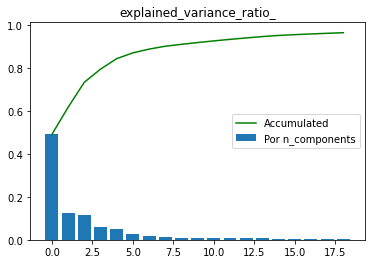

In [5]:
from sklearn.decomposition import PCA
for n in (np.arange(1,20)):
    #Entreno el PCA
    pca = PCA(n_components=n)
    df=pca.fit_transform(df_model)
    
    
    print('n_components = ',n)
    print('explained variance ratio   ',pca.explained_variance_ratio_)
    print('Informacion que contiene este dataset: ' , pca.explained_variance_ratio_.sum()*100,'%' )
    print()
## ploteo grafico de barras
plt.bar(x=np.arange(n),height=pca.explained_variance_ratio_,label='Por n_components')

## Creo curva acumulada y la ploteo
explained_variance_acc=pd.Series(pca.explained_variance_ratio_).cumsum()
plt.plot(np.arange(n),explained_variance_acc,label='Accumulated',c='g')

plt.title('explained_variance_ratio_')
plt.legend(loc='center right')
plt.show()

Utilizaremos n_components = 4 que son el 80% de los datos

In [6]:
n=4
pca = PCA(n_components=n)
df_model_new=pca.fit_transform(df_model)

df_model=pd.DataFrame(df_model_new,index=df_model.index,columns=np.arange(1,n+1))


Analisis PCA de cada variable para poder interpretar los coeficientes de cada modelo.

In [7]:
df_model
pca.components_.shape


(4, 68)

PC  1
surface_covered_rescalado    0.443721
surface_total_rescalado      0.420079
rooms_rescalado              0.417942
bedrooms_rescalado           0.410913
price                        0.378806
Name: 1, dtype: float64


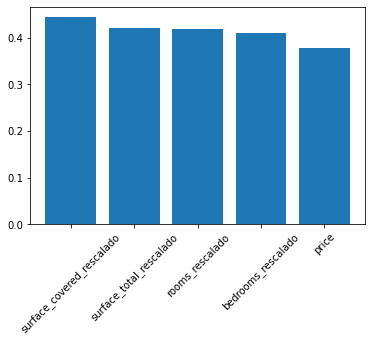

PC  2
lon_rescalado         0.257198
bedrooms_rescalado    0.154586
rooms_rescalado       0.140562
property_type_PH      0.053170
l3_Caballito          0.044889
Name: 2, dtype: float64


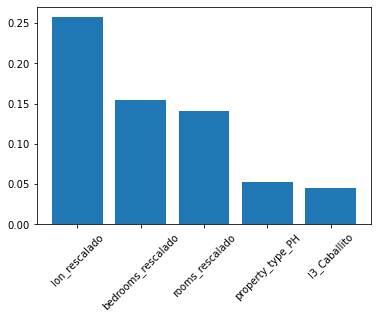

PC  3
bedrooms_rescalado         0.141613
rooms_rescalado            0.125783
surface_total_rescalado    0.103198
property_type_PH           0.098488
l3_Villa Urquiza           0.041355
Name: 3, dtype: float64


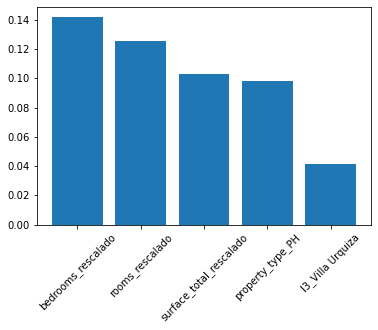

PC  4
bedrooms_rescalado    0.498545
rooms_rescalado       0.474218
lat_rescalado         0.368728
lon_rescalado         0.209601
property_type_PH      0.039157
Name: 4, dtype: float64


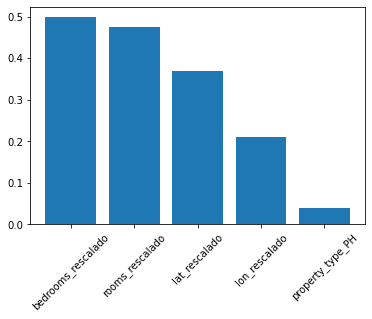

In [8]:
n=4
components_pc=pd.DataFrame(data=pca.components_,columns=X.columns,index=np.arange(1,n+1))
components_pc=components_pc.transpose()

for i in np.arange(1,n+1):
    pc=components_pc.sort_values(by=i,ascending=False).abs().iloc[0:5,i-1]

    print('PC ' , i)
    print(pc)
    plt.bar(x=pc.index,height=pc)
    plt.xticks(rotation=45)
    plt.show()


#### K-Means

Calculamos Silhouette y Elbow

In [9]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
lista_distancias_medias = []
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []

# Entrenamos un modelo para cada numero de cluster que queremos testear
K = np.arange(1,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_model)
    
    ##ELBOW
    # Tomamos la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calculamos la distancia media y agregamos a la lista
    distancia_media = np.divide(distancia_total,df_model.shape[0])
    lista_distancias_medias.append(distancia_media)
    if k>1:
        ##SILHOUETTE
        # Tomamos las etiquetas
        etiquetas = km.labels_
    
        # Calculamos el silhouette 
        valor_medio_sil = silhouette_score(df_model, etiquetas)
        lista_sil.append(valor_medio_sil)
    
    print(k)

1
2
3
4
5
6
7
8
9


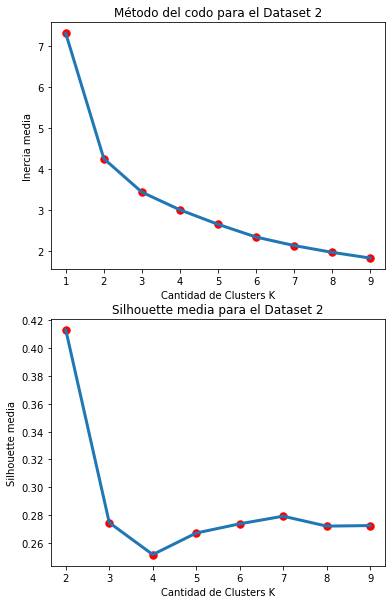

In [10]:
plt.figure(figsize = (6,10))
plt.subplot(211)

plt.plot(K, lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 2')

#plt.xlim(1,4)

plt.subplot(212)
plt.plot(K[1:], lista_sil, lw=3)
plt.scatter(K[1:], lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')


plt.show()



Claramente el ELBOW esta en K=2 y tambien el mayor valor de silhouette esta en 2. Por lo tanto elegimos **K=2**

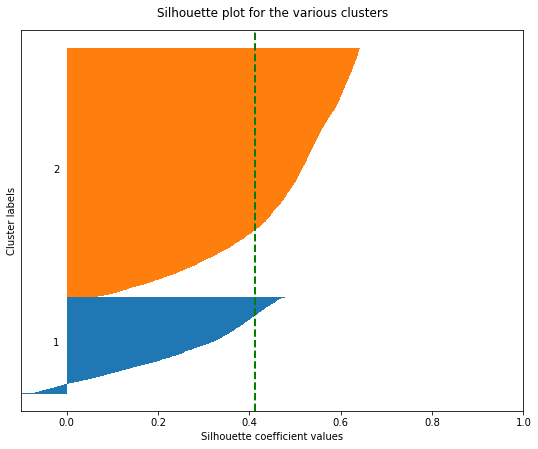

1


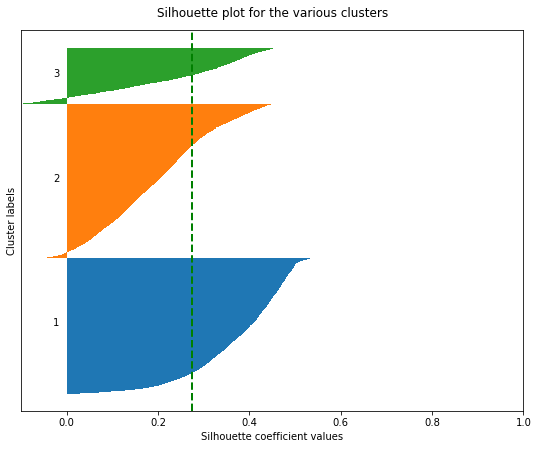

2


In [12]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = df_model
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [2,3]

for i, k in enumerate(lista_k):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.show()
    print(i)

- Podemos ver que en el caso de 2 Clusters el silhouette score promedio es mayor, y ambos cluster tienen valores por encima del promedio. Ademas las geometrias de los dos cluster es similar, pero el tamaño, o sea la cantidad de datos que tiene cada uno es muy distinto. 
- En cambio para el caso de 3 Clusters, se tiene un silhouette score promedio mucho menor, y se tiene geometrias significativamente distintas entre los clusters. La única ventaja (que no es suficiente para elegir este caso) es que tiene cluster de tamaño más similar entre si. 


Esta es otra razon para elegir **k = 2** 

In [13]:
km = KMeans(n_clusters=2)
km = km.fit(df_model)
labels = km.labels_

In [14]:
df_model['label']=labels

In [15]:
df_model['label']=df_model.label.astype(str)

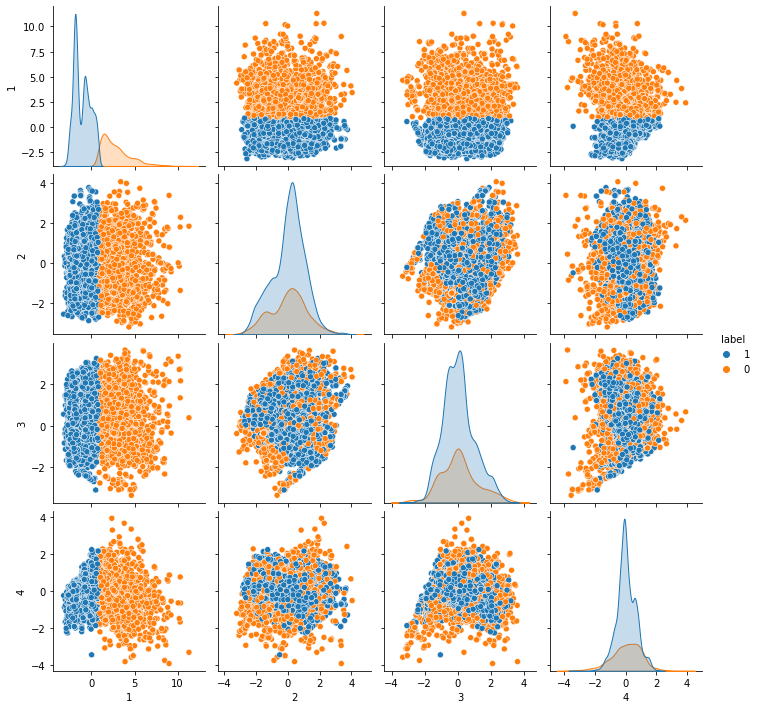

In [20]:
sns.pairplot(data=df_model.iloc[:10000],hue='label')

- En este pairplot se puede ver que la clusterizacion esta realizada principalmente en la variable 1, la cual esta conformada de la siguiente forma: 

    -PC  1
    - surface_covered_rescalado    0.443721
    - surface_total_rescalado      0.420079
    - rooms_rescalado              0.417942
    - bedrooms_rescalado           0.410913
    - price                        0.378806

